# [python-decision-tree-regression-using-sklearn](https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/)

- Decision Tree Regression:
    Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

- Discrete output example: A weather prediction model that predicts whether or not there’ll be rain in a particular day.
- Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


In [5]:
# import dataset 
# dataset = pd.read_csv('Data.csv') 
# alternatively open up .csv file to read data 

dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 

# print the dataset 
print(dataset,dataset.shape) 


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']] (14, 3)


In [10]:
# select all rows by : and column 1 
# by 1:2 representing features 
X = dataset[:, 1:2].astype(int) 

# print X 
print(X,X.shape) 


[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]] (14, 1)


In [7]:
# select all rows by : and column 2 
# by 2 to Y representing labels 
y = dataset[:, 2].astype(int) 

# print y 
print(y) 


[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


[sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [8]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X, y) 


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [12]:
# predicting a new value 

# test the output by changing values, like 3750 
y_pred = regressor.predict([[3750]]) 

# print the predicted price 
print("Predicted price: % d\n"% y_pred) 


Predicted price:  8000



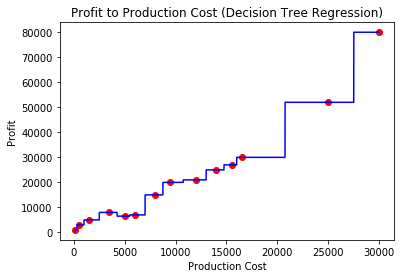

In [13]:
%matplotlib inline
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(X, y, color = 'red') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)') 

# specify X axis label 
plt.xlabel('Production Cost') 

# specify Y axis label 
plt.ylabel('Profit') 

# show the plot 
plt.show() 


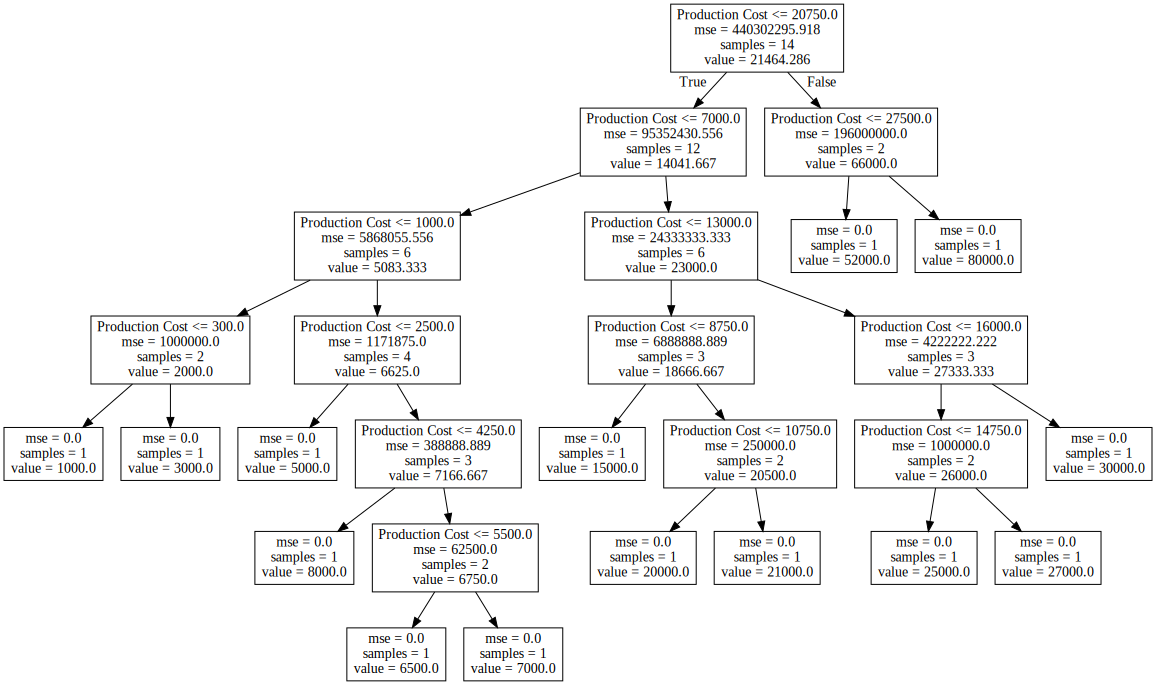

In [17]:
from sklearn.tree import export_graphviz 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
# export_graphviz(regressor, out_file ='tree.dot', 
# 			feature_names =['Production Cost']) 

# graph = Source(tree.export_graphviz(estimator, out_file=None
#    , feature_names=labels, class_names=['0', '1', '2'] 
#    , filled = True))

graph = Source(export_graphviz(regressor, out_file =None, 
			feature_names =['Production Cost']) )
display(SVG(graph.pipe(format='svg')))